# GROUP 7

## Business Problem

**🩺 Data-Driven Stroke Prevention: A Story of Impact and Insight**

Imagine a busy hospital in a growing city. Every day, dozens of patients walk through its doors—young and old, healthy and ill, known and unknown risks. Among them are individuals who, unbeknownst to anyone—not even themselves—are on the brink of a stroke.

Now imagine we could predict who they are.

With the power of data, this isn't a dream. It's a decision away.

Our team explored a large dataset of patient demographics, medical conditions, and lifestyle factors to answer one pressing question:

Can we use this data to prevent strokes before they happen?

1. Who is most at risk of having a stroke?
2. What lifestyle or behavioral patterns are associated with stroke?
3. How do demographic characteristics influence stroke likelihood?
4. Which health indicators should we monitor to prevent strokes?
5. Are there specific groups we should target with intervention programs?
6. How can we use data to improve early stroke detection and prevention?

In [1]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
filename = "train_2v.csv"
df = pd.read_csv(filename)

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43655,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
43656,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
43657,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
43658,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


## ABOUT STROKE

**What is stroke**
    
Stroke is a “brain attack”. It can happen to anyone at any time. It occurs when blood flow
to an area of brain is cut off. When this happens, brain cells are deprived of oxygen and
begin to die. When brain cells die during a stroke, abilities controlled by that area
of the brain such as memory and muscle control are lost.
    
**3 types of stroke**

- Ischemic Stroke: a blood vessel carrying blood to the brain is blocked by a blood clot (ischemic)
- Transient ischemic Stroke (TIS): when blood flow to part of the brain stops for a short period of time
- Hemorrhagic Stroke : the least frequent but most lethal

**Strokes are a very important problem**
- 800,000 strokes per year in the Ghana
- Fitfh leading cause of death in the Ghana
- Leading cause of adult disability in the Ghana
- 80% are preventable

**Lifestyle factors** : factors for stroke people choose to engage in
- Eating habits
- Physical activity
- Smoking and drinking

**Medical risk factors** : factors for stroke that can be controlled
- High blood pressure
- Atrial fibrillation (AFib)
- High cholesterol
- Diabetes (see note below)
- Circulation problems

**Non controlable factors** : factors we cannot control
- Age
- Gender
- Ethnicity    


### Understand stroke attributes in the data file

**ID**: Probably irrelevant unless to avoid duplicates

**Gender**: Relevant: different risks characteristics for men and women

**Age in days**: Relevant: different risks by age

**Hypertension**: Relevant:
- Hypertension is another name for high blood pressure.
- Can lead to severe complications and increases the risk of heart disease, stroke, and death.
- Could be caused by diet issue (increase of salt intake from processed food according to WHO)
- Normal blood pressure is 120 over 80 mm of mercury (mmHg), but hypertension is higher than 130 over 80 mmHg.


**Heart_Disease**: relevant: could cause increase risks. Six causes.
- Heart disease symptoms in your blood vessels (atherosclerotic disease)
- Heart disease symptoms caused by abnormal heartbeats (heart arrhythmias)
- Heart disease symptoms caused by heart defects
- Heart disease symptoms caused by weak heart muscle (dilated cardiomyopathy)
- Heart disease symptoms caused by heart infections
- Heart disease symptoms caused by valvular heart disease

    
**Ever_married** Lifestyle factor. Is this relevant?
-We will need to test.

**Type_Of_Work** Lifestyle factor. Is this relevant?
-We will need to test.

**Residence** Lifestyle factor. Is this relevant?
-We will need to test.

**Avg_Glucose**: Could be relevant. Could create inflammation blocking arteries.
- For people who don't have diabetes, the normal range for an A1c is between 4 percent and 6 percent.
This number is the percent of glucose attached to their red blood cells.
This means their average blood sugar is between 70 and 126 mg/dl.
- Most people with diabetes aim for an A1c score of 7 percent or lower. This means an eAG of 154 mg/dl or less.
- Pregnant women with diabetes should aim for
an A1c between 4 percent and 7 percent.

    
**BMI** or Body Mass Index. Relevant. Could be relevant. To test.
- An index for assessing overweight and underweight, obtained by dividing body weight in kg by height in m^2:
- A measure of 25 or more is considered overweight.   


**Smoking_Status** : relevant. Lifestyle factor.


# Exploratory Data Analysis and Data Cleaning

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43660.000000,43660.000000,43660.000000,43660.000000,43660.000000,42158.000000,43660.000000
mean,36329.762689,42.364474,0.094572,0.048328,104.648922,28.615046,0.023637
std,21076.000408,22.559083,0.292626,0.214461,43.300090,7.766322,0.151918
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18030.500000,24.000000,0.000000,0.000000,77.540000,23.300000,0.000000
50%,36350.500000,44.000000,0.000000,0.000000,91.610000,27.800000,0.000000
75%,54524.250000,60.000000,0.000000,0.000000,112.170000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


Lots of insights already from those basic statistics.
- We see that some ages are negative, or above 100 years. Will need to be cleaned.
- BMI average is quite high for the NL... Looks more like a US average...
- Only 2% stroke.
- Strong standard deviation for Avg_Glucose...
- Need to see if ID is unique or not (same patient seen over time...)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43660 entries, 0 to 43659
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43660 non-null  int64  
 1   gender             43660 non-null  object 
 2   age                43660 non-null  float64
 3   hypertension       43660 non-null  int64  
 4   heart_disease      43660 non-null  int64  
 5   ever_married       43660 non-null  object 
 6   work_type          43660 non-null  object 
 7   Residence_type     43660 non-null  object 
 8   avg_glucose_level  43660 non-null  float64
 9   bmi                42158 non-null  float64
 10  smoking_status     30368 non-null  object 
 11  stroke             43660 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


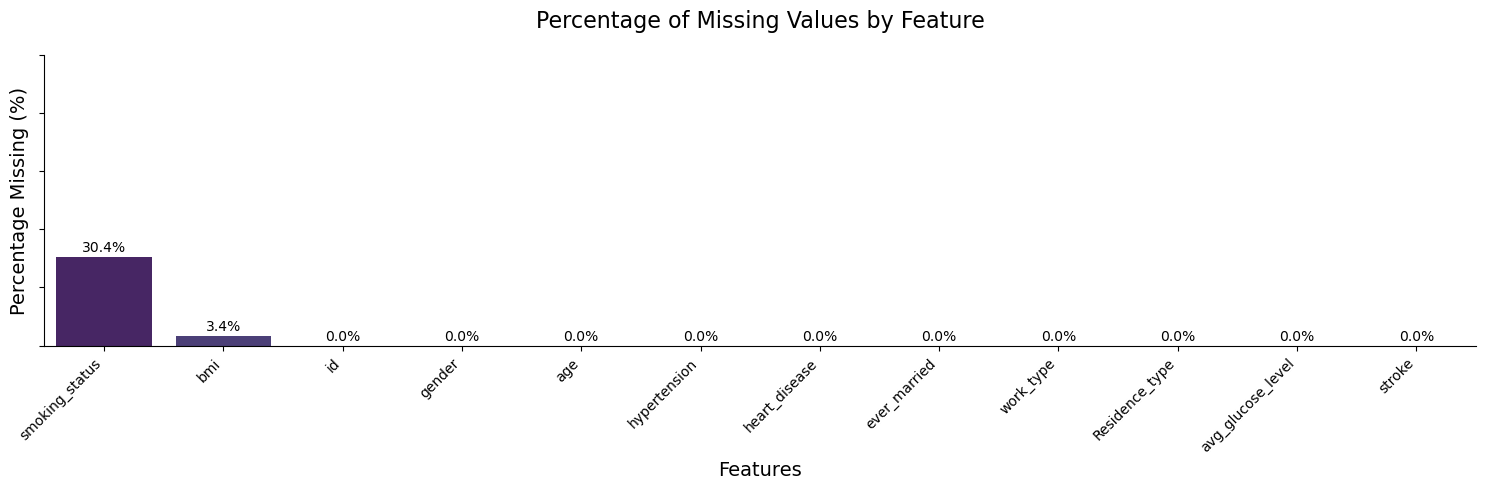

In [6]:
# Calculate missing data statistics
missing_data = df.isnull().sum().to_frame(name='Total')
missing_data['Percent'] = (missing_data['Total'] / len(df)) * 100
missing_data = missing_data.sort_values('Percent', ascending=False)

# Create visualization
plt.figure(figsize=(15, 5))
ax = sns.barplot(
    x=missing_data.index,
    y=missing_data['Percent'],
    hue=missing_data.index,  # Explicit hue assignment
    palette='viridis',
    legend=False  # No legend needed
)

# Customize the plot
plt.title('Percentage of Missing Values by Feature', fontsize=16, pad=20)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage Missing (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Set y-axis limit to 0-100% for percentage scale

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1,
            f'{height:.1f}%',
            ha="center", va="bottom", fontsize=10)

# Remove unnecessary spines
sns.despine()

# Remove y-axis values
ax.set_yticklabels([])

plt.tight_layout()
plt.show()


1. Since only 3% of BMI data are missing, we will replace them with the mean.
2. This will diminish the correlation with other variables but only marginally.

In [7]:
# Calculate mean once (more efficient)
bmi_mean = df['bmi'].mean()

# Fill missing values (both methods work)
df['bmi'] = df['bmi'].fillna(bmi_mean)

# Verification
print(f"Missing values after filling: {df['bmi'].isnull().sum()}")
print(f"New mean: {df['bmi'].mean():.2f}")

Missing values after filling: 0
New mean: 28.62


- Since more than 30% of Smoking data are missing, we will replace them with a new category:unknown,
    - except in the case of kids below the age of 10, we will put 'never smoked' (which is the most likely)
- It is like adding a new isnull feature. Downside: we add a new feature, but it is ok. We have lots of data.

In [8]:
# Handle missing values and children's smoking status
df = df.assign(
    smoking_status = df['smoking_status'].fillna('Unknown')
)
df.loc[df['age'] <= 10, 'smoking_status'] = 'never smoked'

# Verification
print("\nFinal smoking status distribution:")
df['smoking_status'].value_counts(dropna=False)


Final smoking status distribution:


smoking_status
never smoked       20685
Unknown             8822
formerly smoked     7549
smokes              6604
Name: count, dtype: int64

In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43655,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
43656,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
43657,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
43658,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


In [11]:
# Make copies for EDA and modeling to handle encoding separately
df_eda = df.copy()
df_model = df.copy()

# VISUALIZATIONS

Stroke class distribution:
 stroke
0    42628
1     1032
Name: count, dtype: int64
Percentage of positive (stroke) cases: 2.36%


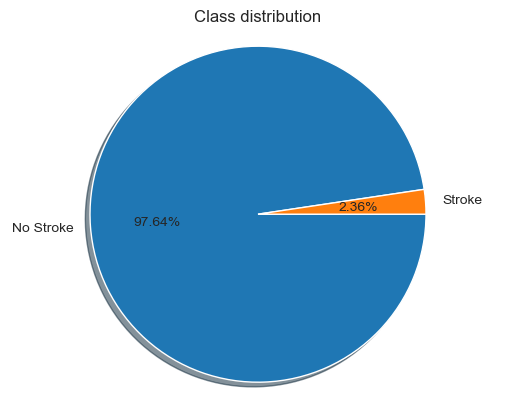

In [12]:
sns.set_style('whitegrid')

# 4.1. Class distribution
stroke_counts = df_eda['stroke'].value_counts()
print("Stroke class distribution:\n", stroke_counts)
print(f"Percentage of positive (stroke) cases: {stroke_counts[1] / stroke_counts.sum() * 100:.2f}%")
# The dataset is highly imbalanced: only ~5% of patients had a stroke.

class_occur = df_eda['stroke'].value_counts()
class_names = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

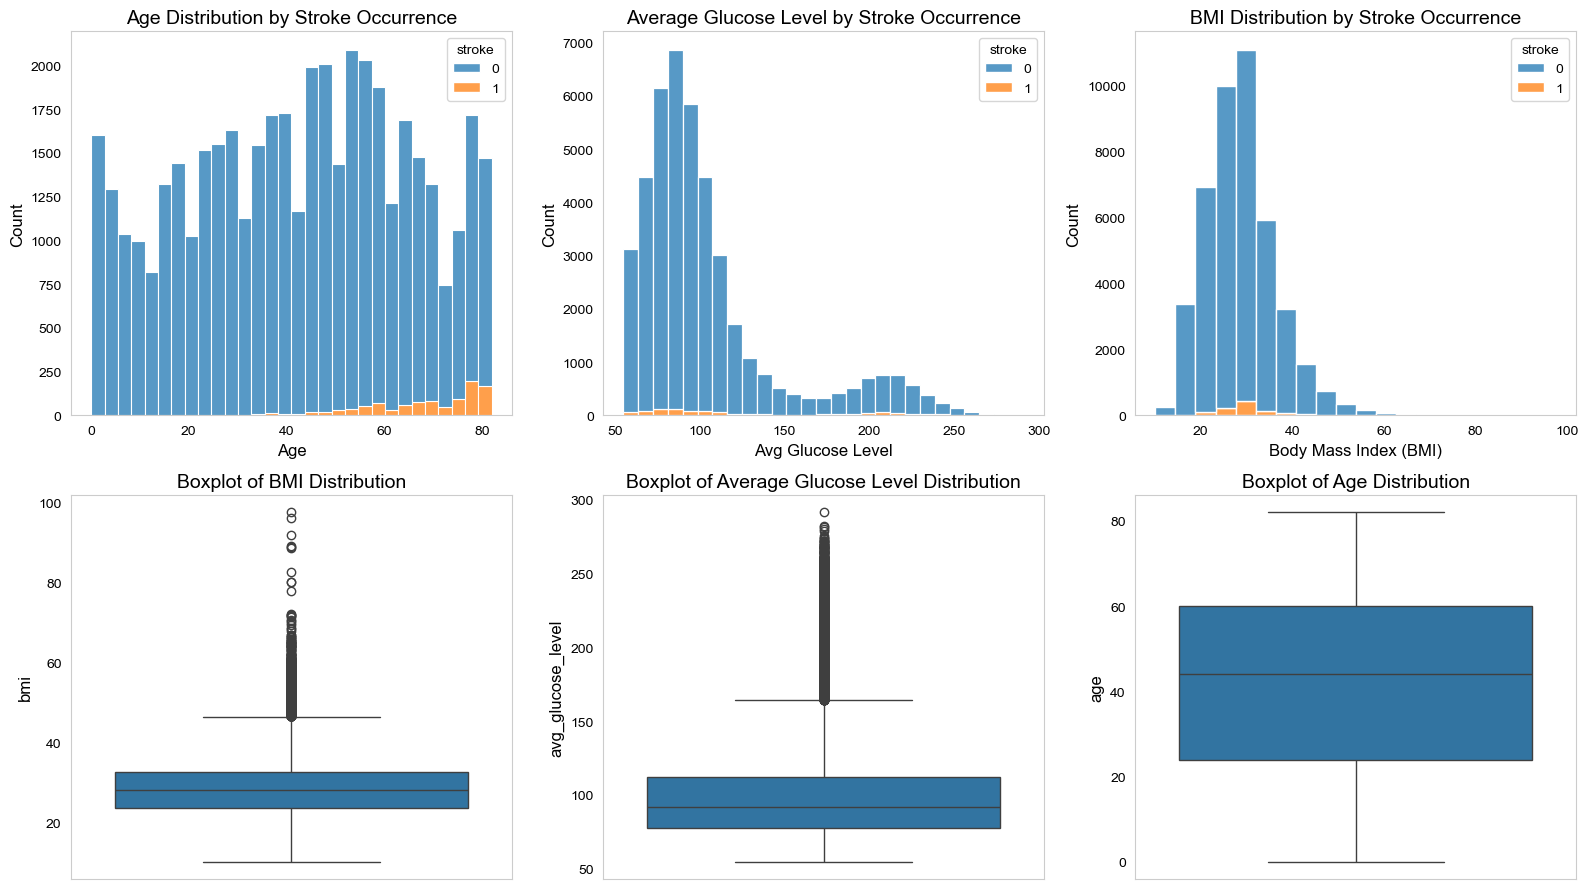

In [13]:
# Set up the figure with 2 rows and 3 columns

sns.set_style('whitegrid')

# Set global font color and weight
plt.rcParams.update({
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
})

ultra_deep_palette = {'0': '#1f77c9', '1': '#ff7f0e'}  # Navy blue and burnt orange

plt.figure(figsize=(16, 9))

# 1. Age Distribution by Stroke Occurrence
plt.subplot(2, 3, 1)
sns.histplot(data=df_eda, x='age', hue='stroke', multiple='stack', bins=30)
plt.title('Age Distribution by Stroke Occurrence')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

# 2. Average Glucose Level by Stroke Occurrence
plt.subplot(2, 3, 2)
sns.histplot(data=df_eda, x='avg_glucose_level', hue='stroke', multiple='stack', bins=27)
plt.title('Average Glucose Level by Stroke Occurrence')
plt.xlabel('Avg Glucose Level')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

# 3. BMI Distribution by Stroke Occurrence
plt.subplot(2, 3, 3)
sns.histplot(data=df_eda, x='bmi', hue='stroke', multiple='stack', bins=20)
plt.title('BMI Distribution by Stroke Occurrence')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Count')
plt.grid(False)  # Explicitly remove gridlines

# 4. BMI BoxPlot
plt.subplot(2, 3, 4)
sns.boxplot(df_eda['bmi'])
plt.title('Boxplot of BMI Distribution')
plt.grid(False)  # Explicitly remove gridlines

# 5. Glucose Level BoxPlot
plt.subplot(2, 3, 5)
sns.boxplot(df_eda['avg_glucose_level'])
plt.title('Boxplot of Average Glucose Level Distribution')
plt.grid(False)  # Explicitly remove gridlines

# 6. Age BoxPlot
plt.subplot(2, 3, 6)
sns.boxplot(df_eda['age'])
plt.title('Boxplot of Age Distribution')
plt.grid(False)  # Explicitly remove gridlines


plt.tight_layout()  # Adjust spacing between plots
plt.show()


**Comments**

Avg_Glucose is not a normal distribution and looks a bit bimodal. The average is 104 with 43 standard deviation.
There seems to be a "normal group" around 70 and a second group above 150.

BMI is slightly skewed to the right
Age distribution looks a little normal


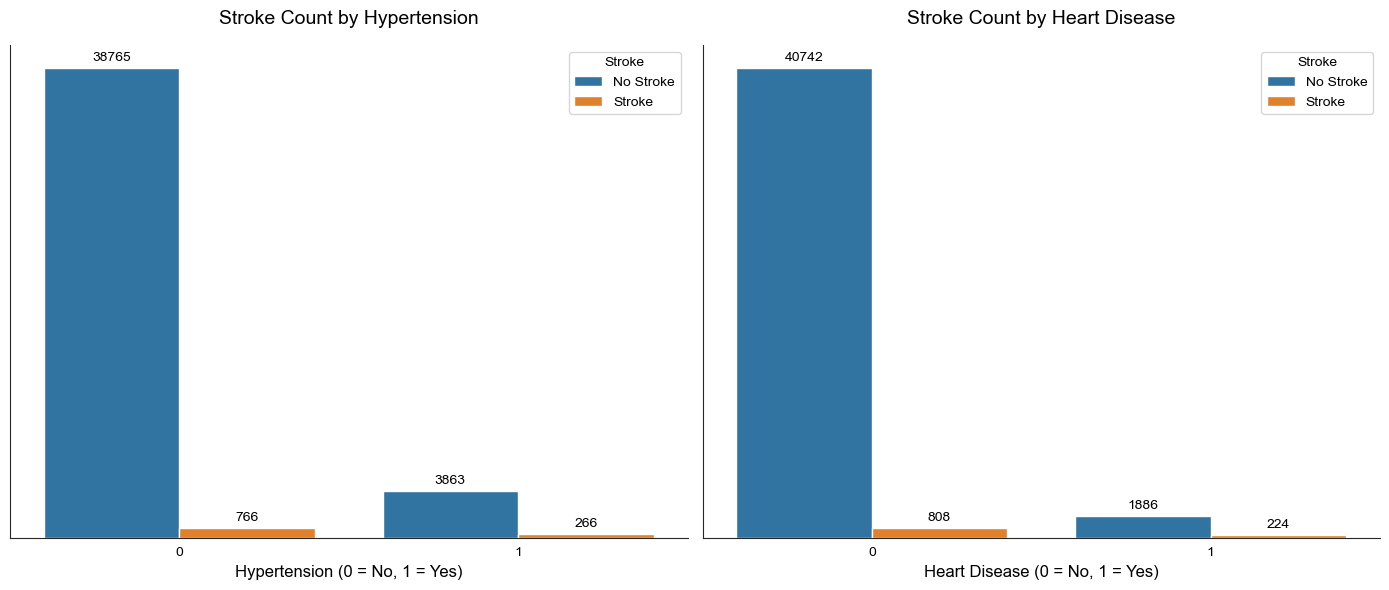

In [14]:
df_eda['stroke'] = df_eda['stroke'].astype(str)
df_eda['hypertension'] = df_eda['hypertension'].astype(str)
df_eda['heart_disease'] = df_eda['heart_disease'].astype(str)

sns.set_style("white")

plt.rcParams.update({
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.titlesize': 14,
    'axes.labelsize': 12,
})

colors = ['#1f77b4', '#ff7f0e']  # Blue (No Stroke), Orange (Stroke)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hypertension plot
ax0 = sns.countplot(data=df_eda, x='hypertension', hue='stroke', palette=colors, ax=axes[0])
axes[0].set_title('Stroke Count by Hypertension', fontsize=14, pad=15)
axes[0].set_xlabel('Hypertension (0 = No, 1 = Yes)')
axes[0].set_ylabel('')  # Remove y-label
axes[0].tick_params(axis='y', left=False, labelleft=False)  # Remove ticks and tick labels

# Add data labels
for container in ax0.containers:
    ax0.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Heart Disease plot
ax1 = sns.countplot(data=df_eda, x='heart_disease', hue='stroke', palette=colors, ax=axes[1])
axes[1].set_title('Stroke Count by Heart Disease', fontsize=14, pad=15)
axes[1].set_xlabel('Heart Disease (0 = No, 1 = Yes)')
axes[1].set_ylabel('')  # Remove y-label
axes[1].tick_params(axis='y', left=False, labelleft=False)  # Remove ticks and tick labels

# Add data labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Despine and show
for ax in axes:
    sns.despine(ax=ax)
    ax.legend(title='Stroke', labels=['No Stroke', 'Stroke'])

plt.tight_layout()
plt.show()


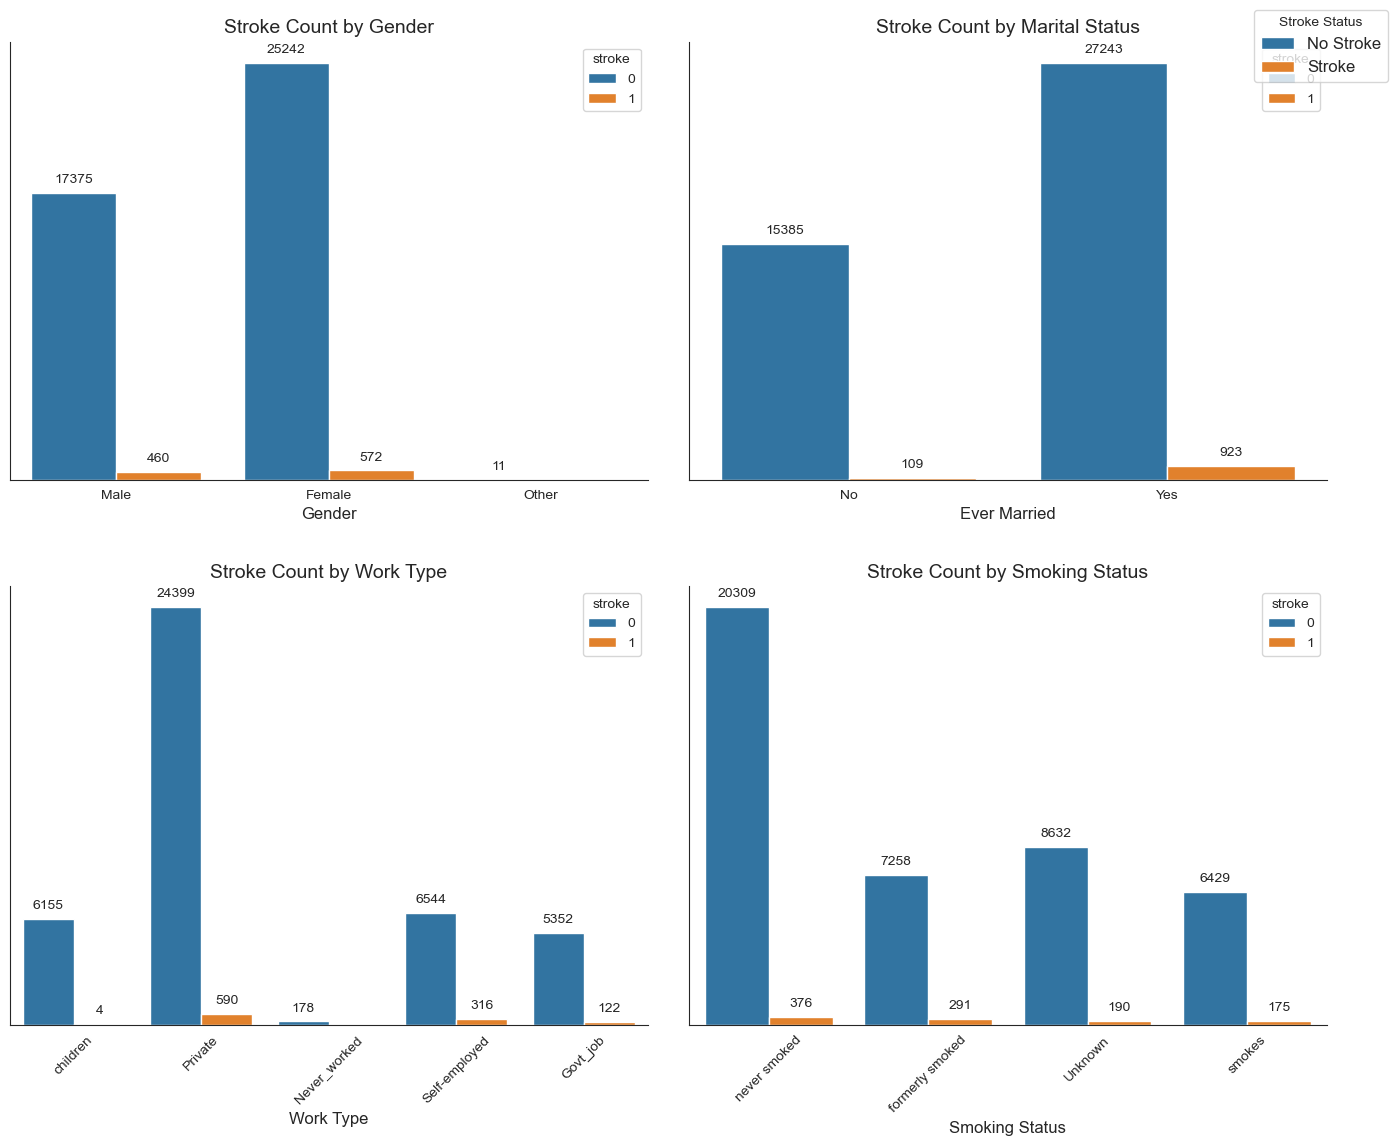

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and consistent stroke color palette
sns.set_style("white")
colors = ['#1f77b4', '#ff7f0e']  # Blue = No Stroke, Orange = Stroke

# Function to add data labels
def add_labels(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='bottom',
                        fontsize=10, xytext=(0, 5),
                        textcoords='offset points')

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Plot 1: Gender
sns.countplot(data=df_eda, x='gender', hue='stroke', palette=colors, ax=axes[0])
axes[0].set_title('Stroke Count by Gender', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('')
axes[0].tick_params(axis='y', left=False, labelleft=False)
add_labels(axes[0])

# Plot 2: Marital Status
sns.countplot(data=df_eda, x='ever_married', hue='stroke', palette=colors, ax=axes[1])
axes[1].set_title('Stroke Count by Marital Status', fontsize=14)
axes[1].set_xlabel('Ever Married')
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', left=False, labelleft=False)
add_labels(axes[1])

# Plot 3: Work Type
sns.countplot(data=df_eda, x='work_type', hue='stroke', palette=colors, ax=axes[2])
axes[2].set_title('Stroke Count by Work Type', fontsize=14)
axes[2].set_xlabel('Work Type')
axes[2].set_ylabel('')
axes[2].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='y', left=False, labelleft=False)
add_labels(axes[2])

# Plot 4: Smoking Status
sns.countplot(data=df_eda, x='smoking_status', hue='stroke', palette=colors, ax=axes[3])
axes[3].set_title('Stroke Count by Smoking Status', fontsize=14)
axes[3].set_xlabel('Smoking Status')
axes[3].set_ylabel('')
axes[3].tick_params(axis='x', rotation=45)
axes[3].tick_params(axis='y', left=False, labelleft=False)
add_labels(axes[3])

# Tidy up: remove gridlines and spines
for ax in axes:
    sns.despine(ax=ax)
    ax.grid(False)

# Adjust layout and show legend outside
fig.tight_layout(pad=3.0)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ['No Stroke', 'Stroke'], loc='upper right', bbox_to_anchor=(1.02, 0.98),
           fontsize=12, title='Stroke Status')

plt.show()


## 📊 Comments on Categorical Stroke Distributions

**🧠1. Stroke Count by Gender**

**Observation:**
- The number of females in the dataset is higher than males. Both genders show significantly more non-stroke cases compared to stroke cases — reinforcing the class imbalance.
- Female group: Slightly more stroke cases (572) than males (401), which aligns with global stroke epidemiology where women may live longer and are therefore more likely to experience strokes in later years.
- Male group: Although fewer males overall, they still show a relatively comparable number of stroke cases, suggesting that stroke risk is fairly balanced across gender once age and other comorbidities are accounted for.

**Insight:**
- Gender alone is not a strong predictor of stroke, but may interact with other variables like smoking, age, or BMI.

**🧠2. Stroke Count by Marital Status**

**Observation:**
- A significant number of stroke cases occurred among individuals who are married, with over 870 stroke events, while only 54 stroke events occurred among those who have never married.

**Interpretation:**
- This distribution is likely confounded by age — as most older individuals are married, and stroke prevalence increases with age.

**Insight:**
- "Ever Married" is acting as a proxy for age, not a causal factor. It shouldn't be treated as a standalone risk factor in modeling but could serve as a weak signal for age group.

**🧠3. Stroke Count by Work Type**

**Observation:**
- The majority of patients work in the private sector, which also accounts for the highest number of stroke cases (566).
- Self-employed and Govt_job categories show moderate stroke counts.
- Children and Never_worked categories have extremely low or no stroke cases, which makes sense due to low age.

**Insight:**
- Most stroke cases are concentrated in the adult working population.
- Work type is indirectly related to stroke due to its correlation with age and socioeconomic factors. It may capture lifestyle/stress exposure indirectly but is not a primary predictor on its own.
- During modeling, "children" and "never_worked" categories may be treated with caution, or consolidated to reduce noise.

**🧠4. Stroke Count by Smoking Status**

**Observation:**
- The majority of patients are categorized as "never smoked", which also contains the majority of stroke cases (789).
- Formerly smoked and smokes categories also contain noticeable but relatively smaller counts (342 and 204 strokes respectively).
- The "Unknown" group surprisingly shows some stroke cases (47), which might represent data entry issues or genuine cases where smoking status wasn't disclosed.

**Insight:**
- Smoking status has some predictive power, but again, it may overlap with age or gender (e.g., older males being more likely to be former smokers).
- The fact that stroke counts still exist in “never smoked” patients indicates smoking is not the only contributing factor, and must be combined with clinical metrics like hypertension, age, glucose, etc.
- Consider flagging the “Unknown” group explicitly during modeling rather than dropping, as it may still carry informative patterns.

**🧠Overall Takeaways:**
Extreme class imbalance is evident across all features. This reinforces the need to use balancing techniques (e.g., SMOTE, class weighting) in any predictive modeling.

Marital status and work type are indirect indicators of age, which remains the strongest predictor of stroke risk.

Gender and smoking status show some patterns but are weaker standalone predictors.

These visualizations are helpful for exploring categorical data patterns, but for risk modeling, they need to be combined with continuous variables like age, glucose, and BMI.

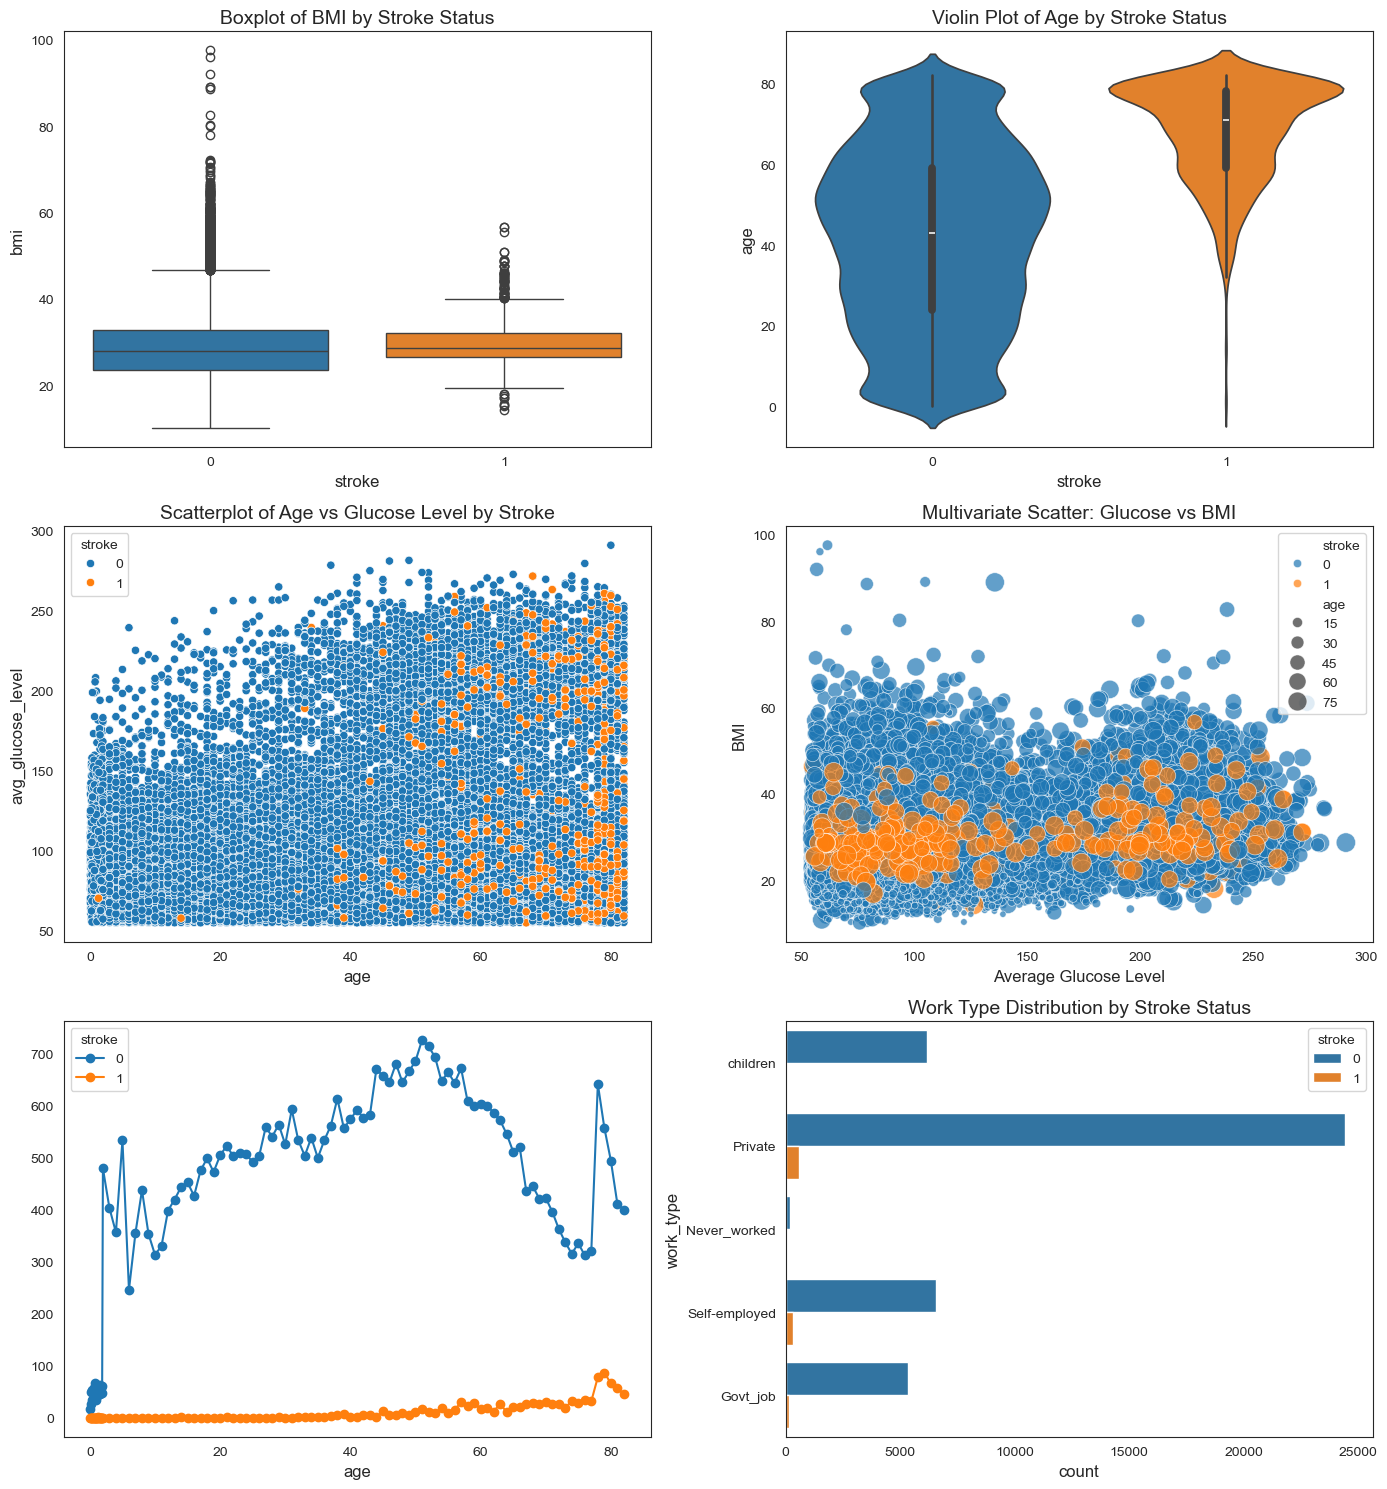

In [16]:
# Define dynamic stroke palette based on actual unique values
unique_strokes = df['stroke'].unique()
palette_dynamic = ['#1f77b4'] if len(unique_strokes) == 1 else ['#1f77b4', '#ff7f0e']

# Set up a 3-row, 2-column grid for 6 charts
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# 1. Boxplot: BMI vs Stroke
sns.boxplot(x='stroke', y='bmi', hue='stroke', data=df, palette=palette_dynamic, ax=axes[0, 0], legend=False)
axes[0, 0].set_title("Boxplot of BMI by Stroke Status")

# 2. Violin Plot: Age vs Stroke
sns.violinplot(x='stroke', y='age', hue='stroke', data=df, palette=palette_dynamic, ax=axes[0, 1], legend=False)
axes[0, 1].set_title("Violin Plot of Age by Stroke Status")


# 3. Scatter Plot: Age vs Glucose colored by Stroke
sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df, palette=palette_dynamic, ax=axes[1, 0])
axes[1, 0].set_title("Scatterplot of Age vs Glucose Level by Stroke")

# 4. Line Plot: Stroke by Age
age_stroke_line = df.groupby('age')['stroke'].value_counts().unstack(fill_value=0)
age_stroke_line.plot(kind='line', marker='o', color=palette_dynamic, ax=axes[2, 0])
axes[1, 1].set_title("Glucose vs BMI (Age Size, Stroke Color)")
axes[1, 1].set_ylabel("Count")

# 5. Multivariate Scatter: Glucose vs BMI with Age size and Stroke color
sns.scatterplot(x='avg_glucose_level', y='bmi',size='age', hue='stroke', data=df, palette=palette_dynamic, sizes=(20, 200),
alpha=0.7,ax=axes[1, 1])

axes[1, 1].set_title("Multivariate Scatter: Glucose vs BMI")
axes[1, 1].set_xlabel("Average Glucose Level")
axes[1, 1].set_ylabel("BMI")

# 6. Funnel Style: Work Type Count by Stroke
sns.countplot(y='work_type', hue='stroke', data=df, palette=palette_dynamic, ax=axes[2, 1])
axes[2, 1].set_title("Work Type Distribution by Stroke Status")

# Adjust layout
plt.tight_layout()
plt.show()


## 📊 Comments on Numeric and Multivariate Stroke Visualizations

**🧠1. Boxplot of BMI by Stroke Status**

**Observation:**
- BMI distribution for stroke and non-stroke patients overlaps heavily, with slightly higher median BMI for stroke patients.
- Both groups show presence of outliers—BMI values over 50 are present in stroke patients.
- Stroke patients appear to have slightly more extreme BMI values, but central tendency remains comparable.

**Insight:**
- BMI alone is not a strong differentiator, but extreme obesity may still elevate risk.

**Recommendation:**
- Consider combining BMI with age or hypertension to derive compound indicators (e.g., obesity in elderly).

**🧠2. Violin Plot of Age by Stroke Status**

**Observation:**
- Stroke patients cluster strongly at the older age range, with few below 50.
- Non-stroke distribution is broader, spanning all age ranges with a peak around 30–40.
- Stroke patient distribution shows a clear right skew, centered ~65–80 years.

**Insight:**
- Age is a critical predictor, showing a stark difference in distribution.

**Recommendation:** Incorporate non-linear transformations (e.g., age groups, splines) or threshold-based flags (e.g., age > 60).

**🧠3. Scatterplot of Age vs Avg Glucose Level by Stroke**
**Observation:** Stroke cases (orange) concentrate at higher ages and moderately high glucose levels.

The non-stroke cloud is much denser and spread over all age-glucose combinations.

Some stroke patients show glucose levels over 200, which typically suggests diabetes.

**Insight:** High glucose in older individuals may be a strong warning signal.

**Recommendation:**
- Add a “diabetic risk” feature (e.g., glucose > 180) and test interaction terms between age and glucose.

**🧠4. Line Plot of Stroke Count by Age**

**Observation:**
- Stroke counts rise steeply after age 60, peaking around 75+.
- Below 40, stroke events are rare despite high patient volume in that bracket.

**Insight:**
- Age > 60 is the high-risk zone, justifying an age threshold for alerting.

**Recommendation:**
- Flag patients 60+ with even one risk factor (e.g., hypertension, heart disease) as high priority for screening.

**🧠5. Multivariate Scatter: Glucose vs BMI with Age Size and Stroke Color**

**Observation:**
- Larger circles (older patients) with high glucose and high BMI tend to be stroke-positive.
- There’s clear clustering of stroke patients where glucose exceeds 150 and BMI > 30.

**Insight:**
- Stroke is more common in patients with combined metabolic risk.

**Recommendation:**
- Consider building interaction features like (glucose × age) or (bmi × hypertension).

**🧠6. Bar Chart – Work Type Distribution by Stroke**

**Observation:**
- The “private” work group dominates in size and in stroke count (500+).
- “Self-employed” and “govt_job” show moderate stroke presence; children and “never_worked” have near-zero.

**Insight:**
- Work type is a proxy for age and lifestyle, not a causal factor.

**Recommendation:**
- Consolidate low-risk groups (“children”, “never_worked”) in modeling. Focus on adult categories for predictions.

- We create a function to compare for each the number of stroke and stroke % (we will use this thru this notebook), then to compare side by side with a histogram.

In [17]:
def nb_percent_stroke_equal(df, column, cat, depvar):
    test_c = df[df[column] == cat]
    test_cs = test_c[test_c[depvar] == 1]
    # Check if test_c is empty to avoid ZeroDivisionError
    if test_c.shape[0] == 0:
        sp = 0  # or np.nan, depending on how you want to handle empty categories
    else:
        sp = round(test_cs.shape[0] / test_c.shape[0] * 100, 2)
    a1 = np.array([[test_c.shape[0], test_cs.shape[0], sp]])
    return a1

def nb_percent_stroke_notequal(df,column,cat,depvar):
    test_c =df[df[column] != cat]
    test_cs = test_c[test_c[depvar] == 1]
    sp=round(test_cs.shape[0]/test_c.shape[0]*100,2)
    #print("Number of non",cat,":", test_c.shape[0], " stroke number:",test_cs.shape[0],
    # ",stroke percent :",sp)
    a2=np.array([[test_c.shape[0],test_cs.shape[0],sp]])
    return a2;

In [18]:
from functools import partial
def compare(f1,cat1,f2,cat2,f3=None,cat3=None,f4=None,cat4=None, f5=None, cat5=None):
    if f3 is None:
        a=np.concatenate((f1(),f2()), axis=0)
        df= pd.DataFrame(columns=['nb observation', 'nb strokes', 'stroke%'])
        df=pd.DataFrame(data=a,    # values
        index=[cat1,cat2],    # index
        columns=["Nb observations","Stroke nb","Stroke %"])  # columns
    elif f4 is None:
        f3()
        a=np.concatenate((f1(),f2(),f3()), axis=0)
        df= pd.DataFrame(columns=['nb observation', 'nb strokes', 'stroke%'])
        df=pd.DataFrame(data=a,    # values
        index=[cat1,cat2,cat3],    # index
        columns=["Nb observations","Stroke nb","Stroke %"])  # columns
    elif f5 is None:
        f4()
        a=np.concatenate((f1(),f2(),f3(), f4()), axis=0)
        df= pd.DataFrame(columns=['nb observation', 'nb strokes', 'stroke%'])
        df=pd.DataFrame(data=a,    # values
        index=[cat1,cat2,cat3, cat4],    # index
        columns=["Nb observations","Stroke nb","Stroke %"])  # columns

    else:
        a=np.concatenate((f1(),f2(),f3(),f4(),f5()), axis=0)
        df= pd.DataFrame(columns=['nb observation', 'nb strokes', 'stroke%'])
        df=pd.DataFrame(data=a,    # values
        index=[cat1,cat2,cat3,cat4, cat5],    # index
        columns=["Nb observations","Stroke nb","Stroke %"])  # columns

    df1=df.T
    return df1;


In [19]:
# Define comparison function with proper typing
from functools import partial
import pandas as pd

def compare_work_type_stats(df: pd.DataFrame,
                           work_type_col: str,
                           target_group: str,
                           stroke_col: str) -> pd.DataFrame:
    """Compare stroke statistics between children and adults by work type."""
    # Filter data
    children = df[df[work_type_col] == target_group]
    adults = df[df[work_type_col] != target_group]

    # Calculate metrics
    results = pd.DataFrame({
        'children': [
            len(children),
            children[stroke_col].sum(),
            children[stroke_col].mean() * 100
        ],
        'adults': [
            len(adults),
            adults[stroke_col].sum(),
            adults[stroke_col].mean() * 100
        ]
    }, index=['Nb observations', 'Stroke count', 'Stroke %'])

    return results.round(2)

# Generate the comparison
results = compare_work_type_stats(
    df=df,
    work_type_col='work_type',
    target_group='children',
    stroke_col='stroke'
)

# Display formatted results
print("Stroke Statistics Comparison: Children vs Adults")
display(results)

Stroke Statistics Comparison: Children vs Adults


,children,adults
Nb observations,6159.00,37501.00
Stroke count,4.00,1028.00
Stroke %,0.06,2.74


### Influence of Gender, Age, BMI on Stroke

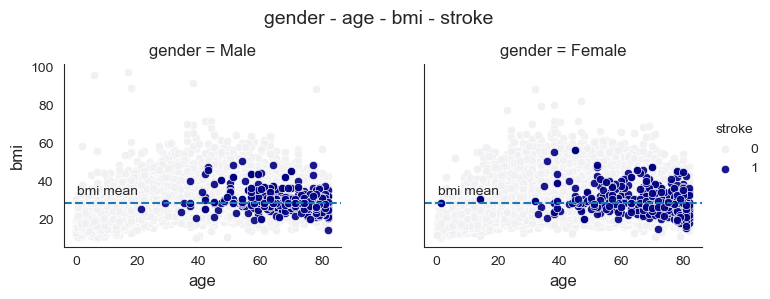

In [20]:
g = sns.FacetGrid(df, col="gender", hue='stroke',
                  col_order=['Male', 'Female'], hue_order=[0,1],
                  aspect=1.2, palette=sns.light_palette('navy', 2))
g.map(plt.scatter, "age", "bmi", alpha=0.9,
      edgecolor='white', linewidth=0.5)
fig = g.fig

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(28.61, ls='--')
    ax2.axhline(28.61, ls='--')
    ax1.text(0.5,33, "bmi mean")
    ax2.text(0.5,33, "bmi mean")

fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('gender - age - bmi - stroke', fontsize=14)
plt.grid(False)
l = g.add_legend(title='stroke')

- **Age is a factor**: there is a clear increase in stroke rate above 40 years. Almost no Stroke below 20 years.
    - An idea would be to bin Age: 0-20,20-40, 40-60, 60-80, 80-100
- **BMI (obesity) should be a factor**
    - There are more strokes one standard deviation around the BMI mean (+/- 7.65).
    - High BMI seem to contribute to slightly more strokes than low BMI.
    - BMI mean is relevant, since we have few outliers.
- **Gender is a factor**: it is not clear on the chart, but clear if we run the numbers

In [21]:
stroke_pred40plus = df[df['age'] >= 40]
compare(
    partial(nb_percent_stroke_equal, stroke_pred40plus,'gender','Male','stroke'),'`Male',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'gender','Female','stroke'),'Female'
     )

,`Male,Female
Nb observations,9960.00,14500.00
Stroke nb,452.00,548.00
Stroke %,4.54,3.78


### Influence of Gender, Age, Avg_Glucose on Stroke

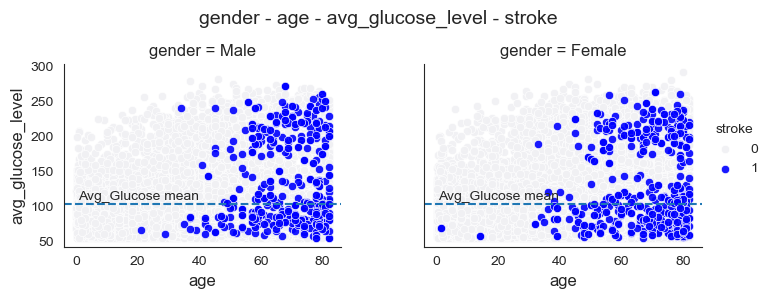

In [22]:
g = sns.FacetGrid(df, col="gender", hue='stroke',
                  col_order=['Male', 'Female'], hue_order=[0,1],
                  aspect=1.2, palette=sns.light_palette('blue', 2))
g.map(plt.scatter, "age", "avg_glucose_level", alpha=0.9,
      edgecolor='white', linewidth=0.5)

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(104.48, ls='--')
    ax2.axhline(104.48, ls='--')
    ax1.text(0.5,110, "Avg_Glucose mean")
    ax2.text(0.5,110, "Avg_Glucose mean")

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('gender - age - avg_glucose_level - stroke', fontsize=14)
plt.grid(False)
l = g.add_legend(title='stroke')

- **Glucose is a factor**
- Males/Female seem to have more stroke in very high glucose groups (above 170 mg/l) AND in low glucose groups (below 100 mg/l), but less so in beetween 100 and 170.
- In one standard deviation above the mean, glucose seem to be less a factor (we see two separate groups)
- We will bin Avg_Glusose to get more insights

### Influence of Marriage, Age, BMI on Stroke

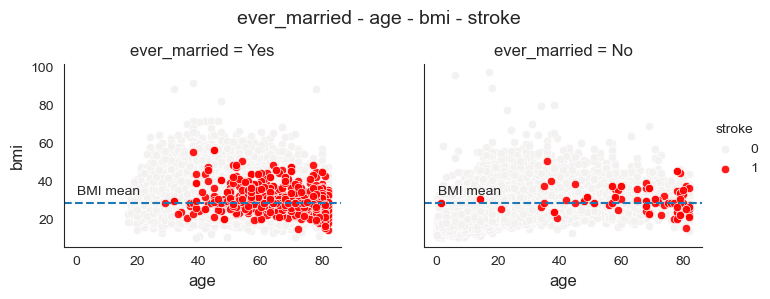

In [23]:
g = sns.FacetGrid(df, col="ever_married", hue='stroke',
                  col_order=['Yes', 'No'], hue_order=[0,1],
                  aspect=1.2, palette=sns.light_palette('red', 2))
g.map(plt.scatter, "age", "bmi", alpha=0.9,
      edgecolor='white', linewidth=0.5)

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(28.61, ls='--')
    ax2.axhline(28.61, ls='--')
    ax1.text(0.5,33, "BMI mean")
    ax2.text(0.5,33, "BMI mean")

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('ever_married - age - bmi - stroke', fontsize=14)
plt.grid(False)
l = g.add_legend(title='stroke')

- **Marriage is a factor**. It appears like Ever_Married people = Yes are more affected by strokes after the age of 40 than non married people. **However**, since there are more married than non married people, this make sense. What matters is the stroke %.
- Based on the calculation below*, the risk of stroke is actually inferior for Ever_Married = Yes than non Married.
    - It would be ideal to assess people who are currently married vs non married but we don't have the data.
- BMI looks slightly higher for married than for non married people.


In [24]:
stroke_pred40plus = df[df['age'] >= 40]
compare(
    partial(nb_percent_stroke_equal, stroke_pred40plus,'ever_married','Yes','stroke' ),'Ever_Married people = Yes',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'ever_married','No','stroke'),'Ever_Married people = No')

,Ever_Married people = Yes,Ever_Married people = No
Nb observations,22446.00,2019.00
Stroke nb,904.00,96.00
Stroke %,4.03,4.75


### Influence of Residence, Age, Avg_Glucose on Stroke

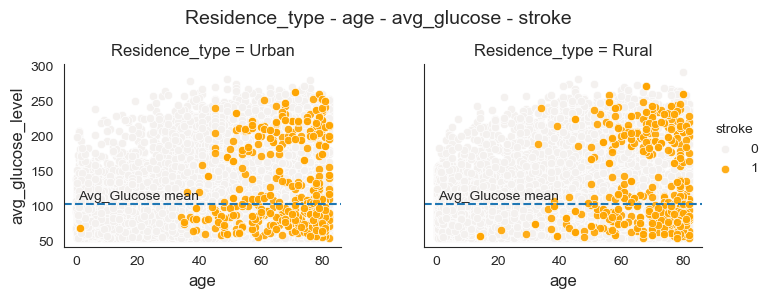

In [25]:
g = sns.FacetGrid(df, col="Residence_type", hue='stroke',
                  col_order=['Urban', 'Rural'], hue_order=[0,1],
                  aspect=1.2, palette=sns.light_palette('orange', 2))
g.map(plt.scatter, "age", "avg_glucose_level", alpha=0.9,
      edgecolor='white', linewidth=0.5)

with sns.axes_style("white"):
    ax1, ax2 = g.axes[0]
    ax1.axhline(104.48, ls='--')
    ax2.axhline(104.481, ls='--')
    ax1.text(0.5,110, "Avg_Glucose mean")
    ax2.text(0.5,110, "Avg_Glucose mean")

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Residence_type - age - avg_glucose - stroke', fontsize=14)
plt.grid(False)
l = g.add_legend(title='stroke')

- **Residence** is a small factor. With more time, we would do a significance test.

In [26]:
compare(
    partial(nb_percent_stroke_equal, stroke_pred40plus,'Residence_type','Urban','stroke'),'Residence_type = Urban',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'Residence_type','Rural','stroke'),'Residence_type = Rural'
     )

,Residence_type = Urban,Residence_type = Rural
Nb observations,12315.00,12150.00
Stroke nb,519.00,481.00
Stroke %,4.21,3.96


### Influence of Work, Age, Avg_Glucose on Stroke

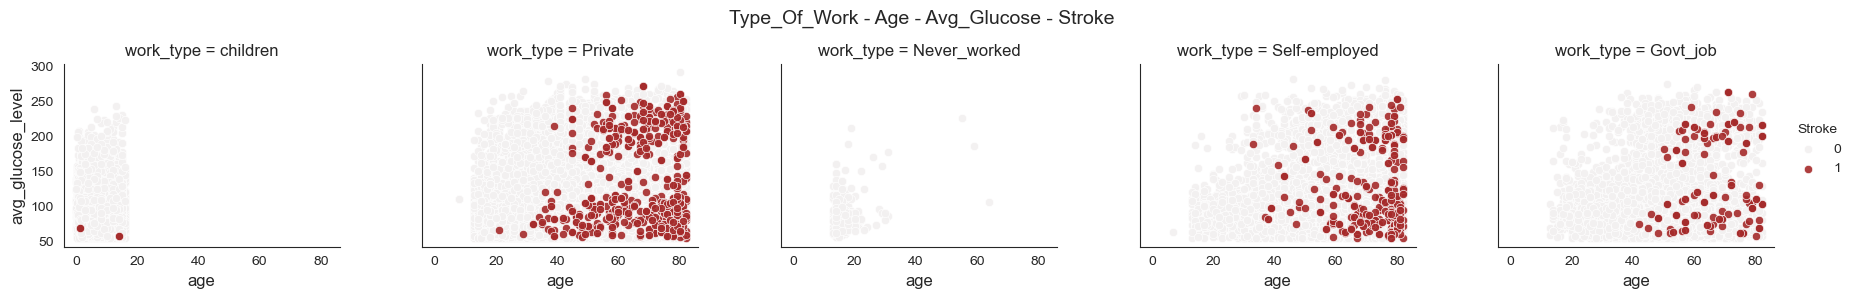

In [27]:
g = sns.FacetGrid(df, col="work_type", hue='stroke',
                  col_order=['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'], hue_order=[0,1],
                  aspect=1.2, palette=sns.light_palette('brown', 2))
g.map(plt.scatter, "age", "avg_glucose_level", alpha=0.9,
      edgecolor='white', linewidth=0.5)

fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Type_Of_Work - Age - Avg_Glucose - Stroke', fontsize=14)
plt.grid(False)
l = g.add_legend(title='Stroke')

- **Work** is a factor (more stroke in Private and Self-employed vs Govt_job).
- However, we need to check the % since the class could be imbalanced.
- Based on the calculation below, Self-employed are more prone to stroke than Private and Govt_job

In [28]:
compare(
    partial(nb_percent_stroke_equal, stroke_pred40plus,'work_type','Private','stroke'),'work_type = Private',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'work_type','Self-employed','stroke'),'work_type = Self-employed',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'work_type','Govt_job','stroke'),'work_type = Govt_job'
     )

,work_type = Private,work_type = Self-employed,work_type = Govt_job
Nb observations,14582.0,5883.00,3997.00
Stroke nb,569.0,309.00,122.00
Stroke %,3.9,5.25,3.05


### Influence of Smoking, Age, BMI on Stroke

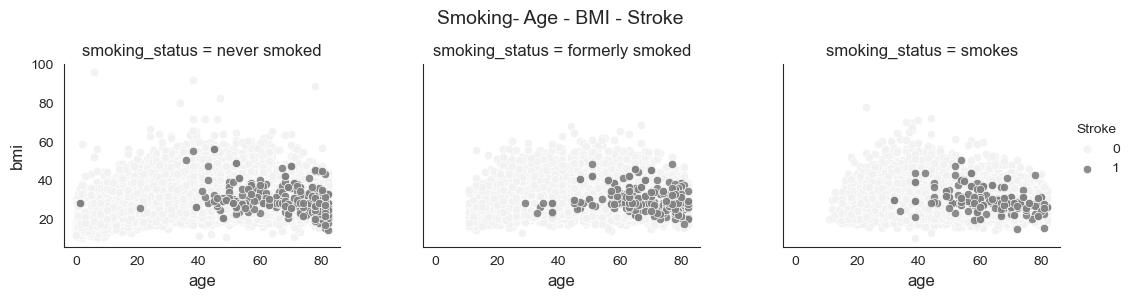

In [29]:
g = sns.FacetGrid(df, col="smoking_status", hue='stroke',
                  col_order=['never smoked', 'formerly smoked', 'smokes'], hue_order=[0,1],
                  aspect=1.2, palette=sns.light_palette('grey', 2))
g.map(plt.scatter, "age", "bmi", alpha=0.9,
      edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Smoking- Age - BMI - Stroke', fontsize=14)
plt.grid(False)
l = g.add_legend(title='Stroke')

- **Smoking** seems to have an influence on stroke if we compare(current+former) smokers versus the group which never smoked.
- We need to be careful to interpret more stroke in the never smoked group (there could be simply more people)
- Current smokers have a slightly lesser BMI than older smoers or people who never smoked.
- The risk of stroke is highest with former smokers based on calculation below for Age >= 40.

In [30]:
compare(
    partial(nb_percent_stroke_equal, stroke_pred40plus,'smoking_status','never smoked','stroke'),'smoking_status = never smoked',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'smoking_status','formerly smoked','stroke'),'smoking_status = formerly smoked',
    partial(nb_percent_stroke_equal, stroke_pred40plus,'smoking_status','smokes','stroke'),'smoking_status = smokes'
    )

,smoking_status = never smoked,smoking_status = formerly smoked,smoking_status = smokes
Nb observations,9704.0,5855.00,4235.00
Stroke nb,369.0,282.00,166.00
Stroke %,3.8,4.82,3.92


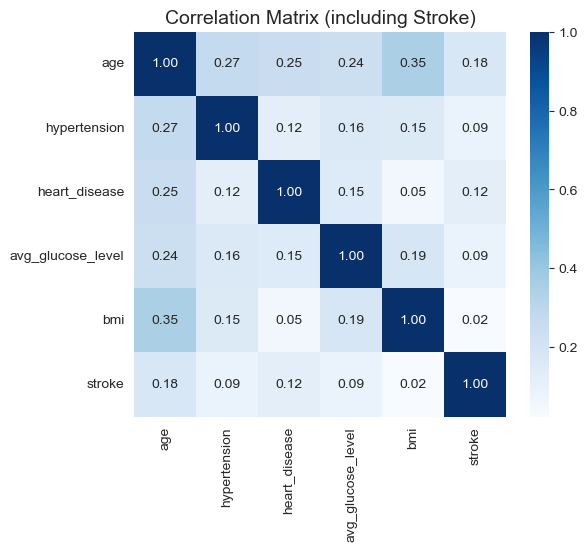

In [31]:
# 4.4. Correlation heatmap for numeric features
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
corr_matrix = df[numeric_features].corr()  # using original df where these are numeric
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix (including Stroke)')
plt.show()
# Insight: Age is positively correlated with stroke. Hypertension and heart_disease have moderate correlation with stroke.
# Avg_glucose_level has a mild correlation. This aligns with the earlier observations.


- Typically, a correlation Heatmap is only done on numeric variable.
- By default, SNS correlation Heatmap also includes binary variables.
- What we see here is that no attributes explains -alone- the dependant variable,
- age 0.18 being the strongest predictor before heart disease 0.12 and Avg_Glucose 0.09.
- BMI seems to be a low predictor.
- No variable seems to be fully correlated with each other (which is good for our modelling): this means there is low colinearity between the predictors variables

# MACHINE LEARNING

In [32]:
# Split features and target
X = df_eda.drop('stroke', axis=1)
y = df_eda['stroke']

# 1. Identify column types
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Define transformers for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Impute numeric values with mean
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# 3. Create the ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

print("Dataset shape after encoding:", df_eda.shape)
print("Encoded feature columns:", df_eda.columns.tolist())




Dataset shape after encoding: (43660, 12)
Encoded feature columns: ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [33]:
# Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Apply transformations to training and testing data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_prepared, y_train)

print("After SMOTE - Training set class distribution:")
print(y_train_sm.value_counts())


After SMOTE - Training set class distribution:
stroke
0    34102
1    34102
Name: count, dtype: int64


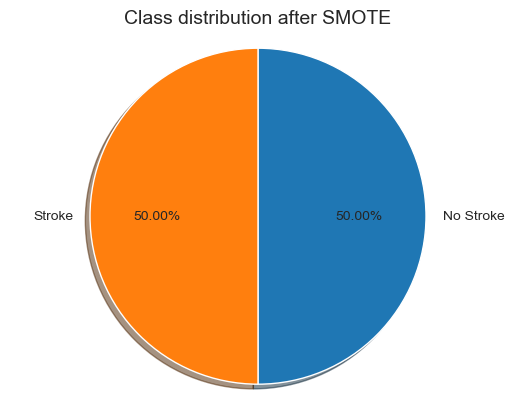

In [34]:
# Class distribution after SMOTE
class_occur_smote = y_train_sm.value_counts()
class_names_smote = ['No Stroke','Stroke']
fig, ax = plt.subplots()
ax.pie(class_occur_smote, labels=class_names_smote, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')
ax.set_title('Class distribution after SMOTE')
plt.show()


In [35]:
# Train the Random Forest on the SMOTE-applied, preprocessed data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_sm, y_train_sm)

# Predict on preprocessed test data
y_pred_rf = rf.predict(X_test_prepared)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8526
           1       0.94      0.42      0.58       206

    accuracy                           0.99      8732
   macro avg       0.96      0.71      0.79      8732
weighted avg       0.99      0.99      0.98      8732

Random Forest Confusion Matrix:
[[8520    6]
 [ 119   87]]


In [36]:
# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train_sm, y_train_sm)

# Predict on preprocessed test data
y_pred_knn = knn.predict(X_test_prepared)

# Classification report
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8526
           1       0.08      0.63      0.15       206

    accuracy                           0.83      8732
   macro avg       0.54      0.73      0.53      8732
weighted avg       0.97      0.83      0.89      8732

Logistic Regression Confusion Matrix:
[[7100 1426]
 [  76  130]]


In [37]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_sm, y_train_sm)

# Use the preprocessed test data
y_pred_lr = lr.predict(X_test_prepared)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      8526
           1       0.07      0.82      0.13       206

    accuracy                           0.75      8732
   macro avg       0.53      0.78      0.49      8732
weighted avg       0.97      0.75      0.84      8732

Logistic Regression Confusion Matrix:
[[6389 2137]
 [  37  169]]


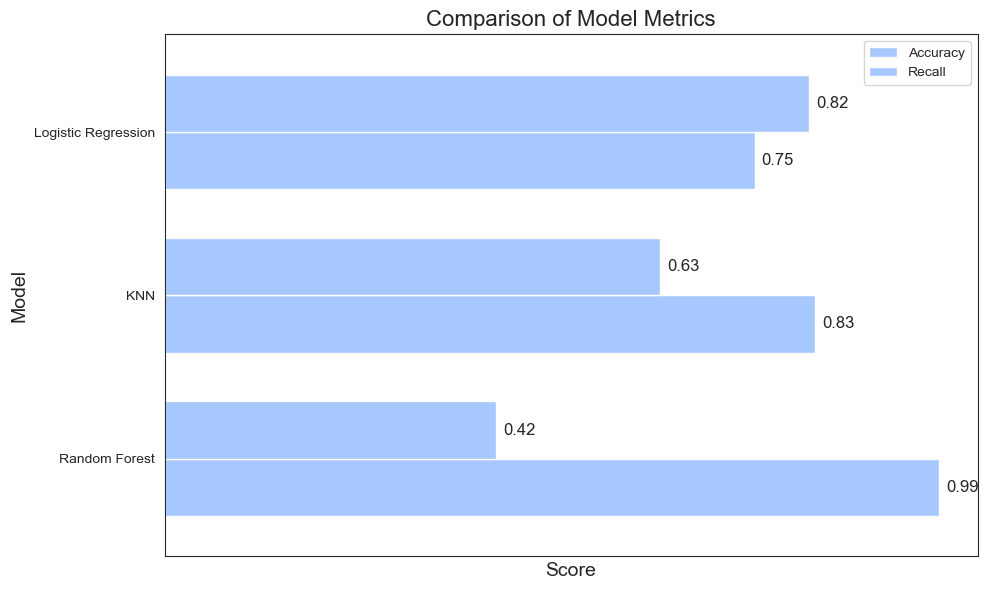

In [38]:
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)

# Extract metrics from the reports
accuracy_rf = report_rf['accuracy']
accuracy_knn = report_knn['accuracy']
accuracy_lr = report_lr['accuracy']

precision_rf = report_rf['1']['precision']
precision_knn = report_knn['1']['precision']
precision_lr = report_lr['1']['precision']

recall_rf = report_rf['1']['recall']
recall_knn = report_knn['1']['recall']
recall_lr = report_lr['1']['recall']

f1_rf = report_rf['1']['f1-score']
f1_knn = report_knn['1']['f1-score']
f1_lr = report_lr['1']['f1-score']

# Models and their corresponding metrics
models = ['Random Forest', 'KNN', 'Logistic Regression']
accuracy = [accuracy_rf, accuracy_knn, accuracy_lr]
precision = [precision_rf, precision_knn, precision_lr]
recall = [recall_rf, recall_knn, recall_lr]
f1_score = [f1_rf, f1_knn, f1_lr]

# Combine all metrics into a DataFrame for plotting
metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    #'Precision': precision,
    'Recall': recall,
    #'F1-Score': f1_score
})

# Set the plot style
sns.set_style("white")

# Create the figure and axes with adjusted figsize
fig, ax = plt.subplots(figsize=(10, 6))

# Define a gradient of blue shades for each metric (from light blue to dark blue)
colors = ['#a6c8ff']

# Plot the bars horizontally for each model and metric with smaller spaces between bars
metrics.set_index('Model').plot(kind='barh', ax=ax, color=colors, width=0.7)

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.2f}', 
                (width, p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=12, xytext=(5, 0),
                textcoords='offset points')

# Customize the plot
plt.title('Comparison of Model Metrics', fontsize=16)
plt.xlabel('Score', fontsize=14)
plt.ylabel('Model', fontsize=14)

# Remove the x-axis values
ax.set_xticks([])

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()
